<a href="https://colab.research.google.com/github/wallajg/Machine-Learning/blob/master/just_messing_around.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just messing around
2.1.0

List all of the files in the default directory
 adc.json	      'bank-names (8).txt'
'bank-names (1).txt'  'bank-names (9).txt'
'bank-names (2).txt'   bank-names.txt
'bank-names (3).txt'  'B:\junk\example.txt'
'bank-names (4).txt'  'D:\junk\Example1 Download to Local.txt'
'bank-names (5).txt'  'Example1 Download to Local.txt'
'bank-names (6).txt'   example.txt
'bank-names (7).txt'   sample_data

Listing all files in the bin directory
bash	       journalctl     sync
bunzip2        kill	      systemctl
bzcat	       kmod	      systemd
bzcmp	       less	      systemd-ask-password
bzdiff	       lessecho       systemd-escape
bzegrep        lessfile       systemd-hwdb
bzexe	       lesskey	      systemd-inhibit
bzfgrep        lesspipe       systemd-machine-id-setup
bzgrep	       ln	      systemd-notify
bzip2	       login	      systemd-sysusers
bzip2recover   loginctl       systemd-tmpfiles
bzless	       ls	      systemd-tty-ask-password-agent
bzmore	       lsblk	     

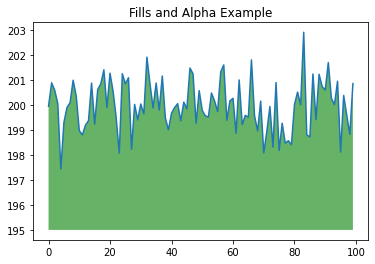

Saving bank-names.txt to bank-names (10).txt
User uploaded file "bank-names.txt" with length 3864 bytes


Mounted at /content/drive
cat: '/content/drive/My Drive/Example2': No such file or directory
cat: Write: No such file or directory
cat: to: No such file or directory
cat: Google: No such file or directory
cat: Drive.txt: No such file or directory
All changes made in this colab session should now be visible in Drive.

Uploaded file with ID 1Jf8QmXwnR7Cc5DMWCQIEtnMMXpCsrngD
Downloaded content "Sample upload file content"

/tmp/to_upload.txt contains:
my sample API fileFile ID: 17_7Dp1lpGjvaFttBAP2EPCVssDU8_7bY
Downloaded file contents are: b'my sample API file'



In [11]:
print ('Just messing around')

%tensorflow_version 2.x

import tensorflow
print (tensorflow.__version__)
print('')

# List all of the files in the default directory
print('List all of the files in the default directory')
!ls
print ('')

# list all of the files in the bin directory
print ('Listing all files in the bin directory')
!ls /bin
print ('')

# Mess around with np and matplotlib
import numpy as np
from matplotlib import pyplot as plt

# create an arrary of random values plus 200 that is one row with 100 columns
ys = 200 + np.random.randn(100)
# print ('ys = ', ys)
# print ('len(ys) = ',len(ys))
# print ('type(ys) = ',type(ys))
# print ('')

# Create an array of all ones with two rows and 50 columns
# ts = np.ones((2,50))
# print ('ts = ', ts)
# print ('')

x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()
print ('')

# Now mess around with uploading files from a local drive
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

print ('')
# Now download a file from Colab to a local drive
from google.colab import files
with open('Example1 Download to Local.txt', 'w') as f:
  f.write('some content')

files.download('Example1 Download to Local.txt')

print('')
# Mounting Google Drive locally
# The example below shows how to mount your Google Drive on your runtime using
# an authorization code, and how to write and read files there. Once executed,
#  you will be able to see the new file (foo.txt) at https://drive.google.com/.

# Note this only supports reading, writing, and moving files; to
# programmatically modify sharing settings or other metadata, use one of the
# other options below.

# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

# Go to this URL in a browser:
# https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
# Enter your authorization code:

# Write to buffer the "Example2 Write to Google Drive.txt" file
with open('/content/drive/My Drive/Example2 Write to Google Drive.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/Example2 Write to Google Drive.txt

# flush and unmount
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

print('')
# PyDrive
# The examples below demonstrate authentication and file upload/download using
# PyDrive. More examples are available in the PyDrive documentation.

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create and upload a text file.
uploaded = drive.CreateFile({'title': 'Sample PyDrive upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

#  Load a file by ID and print its contents.
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
print('')

# Drive REST API
# In order to use the Drive API, we must first authenticate and construct
# an API client.

from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# With this client, we can use any of the functions in the Google Drive
# API reference. Examples follow.

# Creating a new Drive file with data from Python
# First, create a local file to upload.

with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample API file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

# Upload it using the files.create method. Further details on uploading
# files are available in the developer documentation.

from googleapiclient.http import MediaFileUpload
file_metadata = {
  'name': 'Sample API file',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/tmp/to_upload.txt', 
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))


# Downloading data from a Drive file into Python
# Download the file we uploaded above.

file_id = created.get('id')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))
print ('')

